## Assignment Statement

One simple test to determine whether a random number generator is giving random values from a distribution with distribution function $F(x)$ is that of Kolmogorov and Smirnov. 

Using the random number generator, obtain a sample of size $n$. 

Order the sample with $x_r$ being the $r$th smallest observation. 

Define the sample distribution function $S_n$ to be $$ S_n(x) = \begin{cases} 0 \text{ for } x < x_{(1)} \\ \frac{r}{n} \text{ for } x_{(r)} \leq x < x_{(r+1)} \\ 1 \text{ for } x_{(n)} \leq x \end{cases}$$

Then, for $n$ larger than $80$, it can be shown that if the $x$'s are truly coming from $F$, then, with probability $0.99$, $$ \text{sup}_x \vert S_n(x) - F(x) \vert < \dfrac{1.6276}{\sqrt{n}}.$$

Use the random number generator, $X_{n+1} = 7^5 X_n \text{mod}(2^{31} -1)$, to generate a sample of size $1,000$ from the uniform distribution on the unit interval.

Does your sample pass the Kolmogorov-Smirnov test?

## Assignment Minimal Requirements

### Imports

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

### Generate Data

In [2]:
# Declare the values for the random number generator.
increment = 0
multiplier = 7**5
modulus = (2**31)-1
number_of_iterations = 1000

# The seed value is not explicitly provided, so I'll start with 1.
seed_value = 1

In [32]:
# We create our starting lists
values = [seed_value]

function_values = []
scaled_ordered_values = []
uniform_values = []
step_function_levels = []

# I want to create an index list for the dataframe.
index_list = np.arange(1, number_of_iterations + 1)

In [33]:
# Generate the random number generated values.
for _ in range(number_of_iterations):

    # Calculate the next value.
    next_value = (multiplier * values[-1] + increment) % modulus

    # Store the value to the list.
    values.append(next_value)

# We now have 1001 values, including our seed value.
# We drop the seed value, which is currently the first one in the list, leaving us with the 1,000 we wanted.
values.pop(0)

# We put the values in order
ordered_values = sorted(values)

# To scale the values to be on the unit inverval, I will divide through by the modulus.
for number in ordered_values:
    scaled_value = number/modulus
    scaled_ordered_values.append(scaled_value)

# We generate values from the theoretical distribution.
uniform_values = np.random.uniform(0,1,number_of_iterations)

# Sort the uniform values.
sorted_uniform_values = sorted(uniform_values)

# Create the S values.
for i in range(number_of_iterations):
    step_value = (i+1) / number_of_iterations
    step_function_levels.append(step_value)

# We'll need to find the absolute value of the differences for the S and F so that we can find the supremum / max of those.
differences = [abs(s - f) for s, f in zip(scaled_ordered_values, sorted_uniform_values)]

In [62]:
# Create a DataFrame with the ordered values and their corresponding S_n(x) values
df = pd.DataFrame({
    'Index': index_list,
    'X': scaled_ordered_values,
    'S': step_function_levels,
    'F': sorted_uniform_values,
    'Difference': differences
})

df

## As an intermediary step, I want to plot the results and verify that it looks like the CDF for a uniform distribution, which should roughly have the shape of a right triangle with the 90-degree angle on the bottom right.

### We plot the S values.

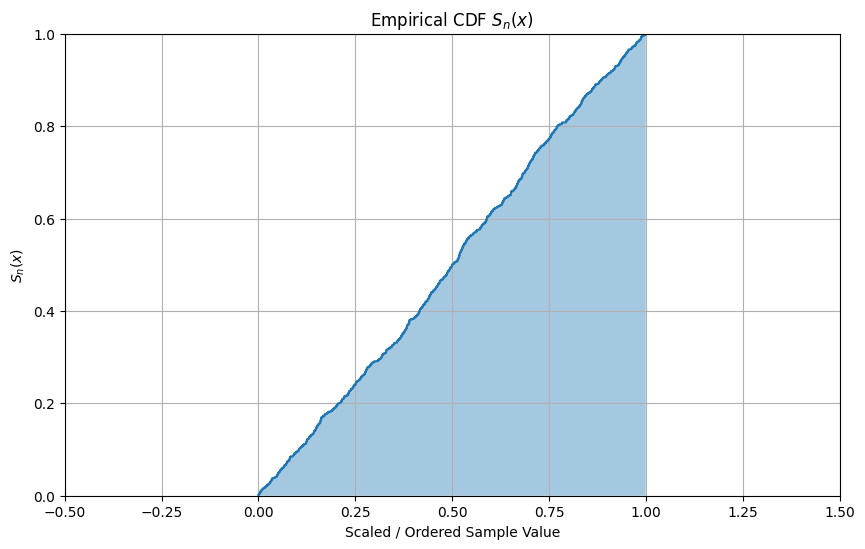

In [59]:
# Plotting the step function for S
plt.figure(figsize=(10, 6))

# We adjust the plot limits so that we make sure we can see the whole shape.
plt.xlim(-0.5, 1.5)
plt.ylim(0, 1)

# We plot the step function with the space under S filled in.
plt.step(df['X'], df['S'], where='post', label='Empirical CDF $S_n(x)$')
plt.fill_between(df['X'], df['S'], step="post", alpha=0.4)

# We label the axes and the plot itself.
plt.xlabel('Scaled / Ordered Sample Value')
plt.ylabel('$S_n(x)$')
plt.title('Empirical CDF $S_n(x)$')
plt.grid(True)

# Display the plot
plt.show()

### The plot of a Uniform(0,1) CDF.

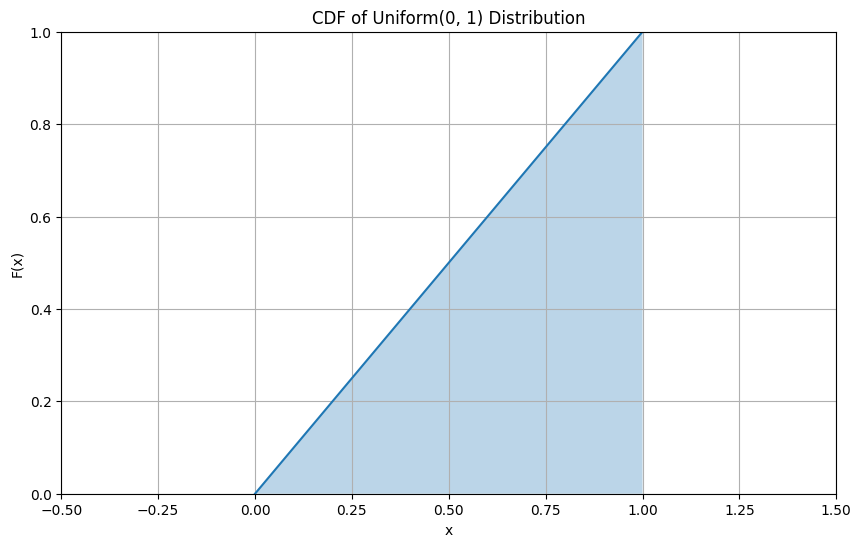

In [65]:
# Plotting the step function for S
plt.figure(figsize=(10, 6))

# We adjust the plot limits so that we make sure we can see the whole shape.
plt.xlim(-0.5, 1.5)
plt.ylim(0, 1)

# Generate our x values.
x = np.linspace(0, 1, 1000)

# Since the CDF of a uniform distribution is F(x) = x for 0 <= x <= 1
cdf = x

# Plot the function and fill beneath.
plt.plot(x, cdf, label='CDF for Uniform(0, 1)')
plt.fill_between(x, 0, cdf, alpha=0.3)

# We label the axes and the plot itself.
plt.xlabel('x')
plt.ylabel('F(x)')
plt.title('CDF of Uniform(0, 1) Distribution')
plt.grid(True)

plt.show()

They do look roughy the same, though obviously with a different scale.

### Find if $\text{sup}_x \vert S_n(x) - F(x) \vert < \dfrac{1.6276}{\sqrt{n}}$

In [70]:
check_value = (1.6276)/(number_of_iterations**(1/2))
print(check_value)

0.05146923119690054


In [71]:
supremum = max(df['Difference'])
print(supremum)

0.04322838604234547


In [72]:
print(supremum < check_value)

True


We get a value of 'True' from above, and therefore the Kolmogorov-Smirnov test indicates that there is no statistically significant difference between the two distributions.

# Additional Requirements

## Does the random number generator generate a uniform distribution on the unit interval?

### Image

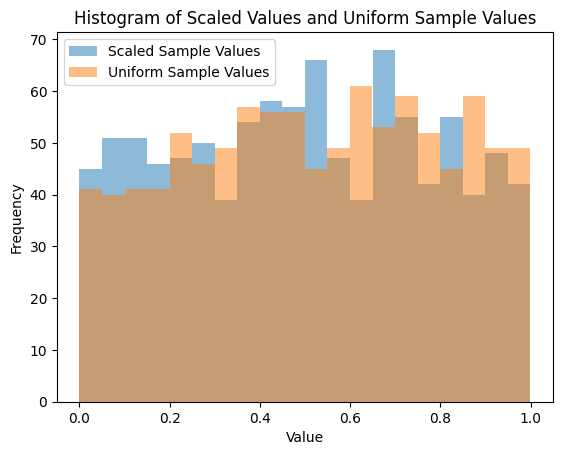

In [80]:
# Generate histograms
plt.hist(df['X'], bins=20, alpha=0.5, label='Scaled Sample Values')
plt.hist(df['F'], bins=20, alpha=0.5, label='Uniform Sample Values')

# Adding labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Scaled Values and Uniform Sample Values')
plt.legend()

# Display the plot
plt.show()


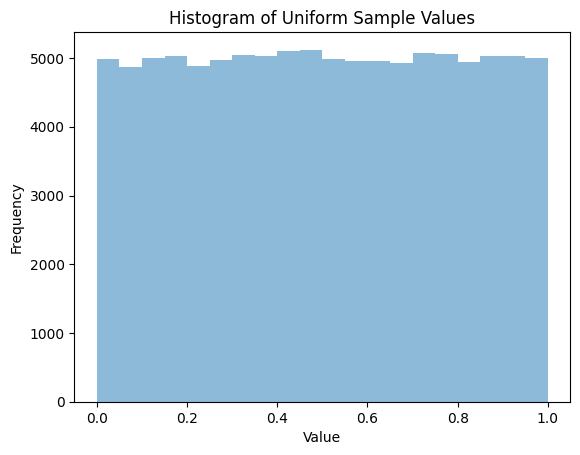

In [82]:
# Generate a separate, larger sample of U(0,1) values.
separate_uniform_values = np.random.uniform(0, 1, 100000)

# Generate histograms
plt.hist(separate_uniform_values, bins=20, alpha=0.5, label='Uniform Sample Values')

# Adding labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Uniform Sample Values')

# Display the plot
plt.show()


### Expected Value and Variance

In [85]:
# The known analytic values for mean and variance of U(0,1)
known_uniform_mean = 0.5
known_uniform_variance = 1/12

# Sample mean and variance
sample_mean_value = np.mean(df['X'])
sample_variance_value = np.var(df['X'])

# Sample statistic results.
print(f"Mean of the scaled sample values: {mean_value}")
print(f"Variance of the scaled sample values: {variance_value}")

# Differences between the sample statistics and analytic values.
print(f"The absolute difference between the sample mean and analytical mean: {abs(known_uniform_mean - sample_mean_value)}")
print(f"This is difference of {(abs(known_uniform_mean - sample_mean_value))/known_uniform_mean} percent of the actual value.")

print(f"The absolute difference between the sample variance and analytical variance: {abs(known_uniform_variance - sample_variance_value)}")
print(f"This is difference of {(abs(known_uniform_variance - sample_variance_value))/known_uniform_variance} percent of the actual value.")

Mean of the scaled sample values: 0.49796137935387036
Variance of the scaled sample values: 0.07874879765754639
The absolute difference between the sample mean and analytical mean: 0.0020386206461296408
This is difference of 0.0040772412922592816 percent of the actual value.
The absolute difference between the sample variance and analytical variance: 0.004584535675786941
This is difference of 0.05501442810944329 percent of the actual value.


### Use In a MC Simulation With Known Result